# **Tarefa 5.1 - Pré-processamento de um conjunto de dados** | *Lucas Omar*

**1. Faça a leitura do arquivo "Churn_Modelling_2.csv" disponível na pasta "Churn" e armazene numa variável como um dataframe;**

In [501]:
import io
import requests
import pandas as pd

df_churn_url = 'https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Churn/Churn_Modelling_2.csv'
df_churn_csv = requests.get(df_churn_url).content
df_churn_dataset = pd.read_csv(io.StringIO(df_churn_csv.decode('utf-8')))
df_churn = pd.DataFrame(df_churn_dataset)
df_churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3.0,1,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.0,1,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2.0,1,0.0,92888.52,1


**2. Elimine instâncias (linhas) com dados ausentes para a variável "IsActiveMember".**

In [502]:
df_churn.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts      10
HasCrCard           0
IsActiveMember     14
EstimatedSalary     0
Exited              0
dtype: int64

In [503]:
df_churn.dropna(subset=['IsActiveMember'], inplace = True)
df_churn.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts      10
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

**3. Faça a imputação dos dados ausentes para a variável "NumOfProducts" utilizando a média da variável.**

In [504]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
df_churn[['NumOfProducts']] = imputer.fit_transform(df_churn[['NumOfProducts']].values)
df_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**4. Crie uma variável (array) X que contenha apenas os valores dos atributos/colunas de "CreditScore" a "EstimatedSalary" utilizando a função "iloc" do Pandas. Em outras palavras, crie uma variável X que receba o dataframe inteiro exceto as 3 primeiras colunas e a última. Observe que as 3 primeiras colunas "RowNumber", "CustomerId" e "Surname" não são importantes e devem ser descartadas. E a última coluna ("Exited") será a variável destino ("target" ou saída) que será criada no próximo passo;**

In [505]:
X = df_churn.iloc[:,3:13].values
print(X)

[[619 'France' 'Female' ... 1 1.0 101348.88]
 [608 'Spain' 'Female' ... 0 1.0 112542.58]
 [502 'France' 'Female' ... 1 0.0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1.0 42085.58]
 [772 'Germany' 'Male' ... 1 0.0 92888.52]
 [792 'France' 'Female' ... 1 0.0 38190.78]]


**5. Crie uma variável (array) y que contenha apenas a última coluna  ("Exited"). Esta é a variável destino ("target" ou saída);**

In [506]:
y = df_churn.iloc[:,13]
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9986, dtype: int64


**6. Codifique a coluna/variável categórica "Geography" como numérica utilizando a classe LabelEncoder da biblioteca scikit-learn;**

In [507]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # cria objeto
le.fit(X[:,1]) # ajusta na variável de entrada
X[:,1] = le.transform(X[:,1]) # aplica a transformação na variável de entrada
print(X)

[[619 0 'Female' ... 1 1.0 101348.88]
 [608 2 'Female' ... 0 1.0 112542.58]
 [502 0 'Female' ... 1 0.0 113931.57]
 ...
 [709 0 'Female' ... 0 1.0 42085.58]
 [772 1 'Male' ... 1 0.0 92888.52]
 [792 0 'Female' ... 1 0.0 38190.78]]


**7. Codifique a coluna/variável categórica "Gender" como numérica utilizando a classe LabelEncoder da biblioteca scikit-learn;**

In [508]:
le = LabelEncoder() # cria objeto
le.fit(X[:,2]) # ajusta na variável de entrada
X[:,2] = le.transform(X[:,2]) # aplica a transformação na variável de entrada
print(X)

[[619 0 0 ... 1 1.0 101348.88]
 [608 2 0 ... 0 1.0 112542.58]
 [502 0 0 ... 1 0.0 113931.57]
 ...
 [709 0 0 ... 0 1.0 42085.58]
 [772 1 1 ... 1 0.0 92888.52]
 [792 0 0 ... 1 0.0 38190.78]]


In [509]:
X.shape

(9986, 10)

**8. Após executar o passo 6, transforme os dados da variável  Geography" para a forma binária utilizando a classe OneHotEncoder da biblioteca scikit-learn eliminando redundância, ou seja, aplicando a codificação de variáveis dummy. Observe que há apenas 3 países (categorias) diferentes. Atenção: esse talvez seja o passo mais difícil da tarefa. Você deve transformar o resultado da variável/coluna "Geography" obtido no passo 6 para o formato binário (one-hot) de modo que fique representado por apenas duas colunas (de 0s e 1s). Além disso, essas duas novas colunas devem permanecer na mesma variável X. Dica: verifique a utilização da função make_column_transformer (Links para um site externo.) da biblioteca scikit-learn;**

In [510]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

enc = OneHotEncoder(drop = 'first', sparse = False) # cria objeto com argumento sparse = False para retornar uma matriz e remover 1o. recurso
ct = make_column_transformer((enc,[1]),remainder = 'passthrough')
X = ct.fit_transform(X)

In [511]:
X

array([[0.0, 0.0, 619, ..., 1, 1.0, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1.0, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0.0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1.0, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0.0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0.0, 38190.78]], dtype=object)

In [512]:
X.shape

(9986, 11)

**9. Divida os variáveis X e y em dados de treino e de teste utilizando o método "train_test_split", gerando as variáveis X_train, X_test, y_train e y_test. Você define a proporção de dados de treino e de teste;**

In [513]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((7489, 11), (2497, 11), (7489,), (2497,))

**10. Faça a padronização dos dados das variáveis X_train e X_test utilizando a classe StandardScaler do scikit-learn;**

In [514]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() #cria objeto
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler() #cria objeto
# X_train = sc.fit_transform(X_train)
# print(X_train)

[[1.         0.         0.442      ... 1.         0.         0.83854753]
 [1.         0.         0.526      ... 0.         0.         0.13978045]
 [0.         0.         0.87       ... 1.         0.         0.81901237]
 ...
 [0.         1.         0.792      ... 0.         0.         0.35953294]
 [1.         0.         0.772      ... 1.         0.         0.14212787]
 [1.         0.         0.806      ... 1.         0.         0.74406886]]
[[0.         0.         0.492      ... 1.         1.         0.06028481]
 [0.         1.         0.138      ... 0.         1.         0.67360898]
 [1.         0.         0.894      ... 0.         0.         0.34881111]
 ...
 [0.         0.         0.52       ... 1.         1.         0.74802624]
 [0.         0.         0.722      ... 1.         1.         0.13379413]
 [0.         0.         0.48       ... 1.         0.         0.29621954]]


# **Tarefa 5.2 - Aplicação de diferentes algoritmos de AM numa tarefa de predição (classificação) Churn - Churn_Modelling** | *Lucas Omar*

**1. Você deve aplicar os seguintes algoritmos de AM:**
* **Regressão Logística**
* **KNN - K-Nearest Neighbors (k-vizinhos mais próximos)**
* **SVM - Support Vector Machines (Máquinas de Vetores de Suporte)**
* **Random Forest**

Taxa de acerto =  80.82 %
Matriz de confusão:


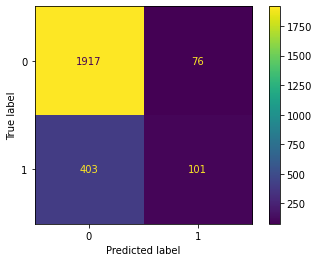

In [515]:
#######################
# Regressão Logística #
#######################

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear') # liblinear => conjuntos pequenos
logreg.fit(X_train,y_train)
classificacoes_logreg = logreg.predict(X_test)

acertos_LogReg = metrics.accuracy_score(y_test,classificacoes_logreg)
print('Taxa de acerto = ',round(acertos_LogReg*100,2),"%")

print('Matriz de confusão:')
cm_logreg = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

Taxa de acerto =  81.58 %
Matriz de confusão:


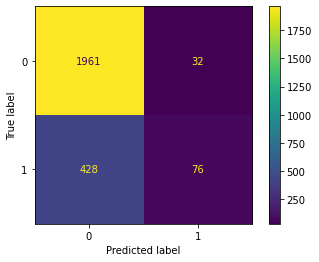

In [516]:
########################################################
# KNN - K-Nearest Neighbors (k-vizinhos mais próximos) #
########################################################
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20) 
knn.fit(X_train,y_train)
classificacoes_knn = knn.predict(X_test)

acertos_knn = metrics.accuracy_score(y_test,classificacoes_knn)
print('Taxa de acerto = ',round(acertos_knn*100,2),"%")

print('Matriz de confusão:')
cm_knn = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

Taxa de acerto =  84.66 %
Matriz de confusão:


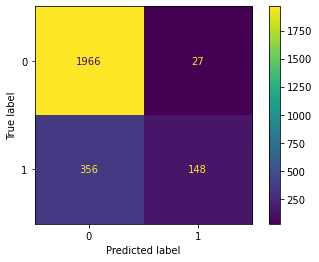

In [517]:
###################################################################
# SVM - Support Vector Machines (Máquinas de Vetores de Suporte ) #
###################################################################
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train, y_train)
classificacoes_svm = svm.predict(X_test)

acertos_svm = metrics.accuracy_score(y_test, classificacoes_svm)
print('Taxa de acerto = ',round(acertos_svm*100,2),"%")

print('Matriz de confusão:')
cm_svm = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)

Taxa de acerto =  85.42 %
Matriz de confusão:


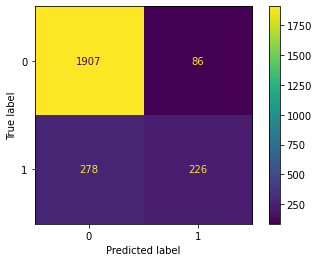

In [518]:
#################
# Random Forest #
#################
from sklearn.ensemble import RandomForestClassifier

# n_estimators é o número de arvores de decisao que ele vai implementar
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)
classificacoes_rf = rf.predict(X_test)

acertos_rf = metrics.accuracy_score(y_test, classificacoes_rf)
print('Taxa de acerto = ',round(acertos_rf*100,2),"%")

print('Matriz de confusão:')
cm_rf = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)